In [1]:
# 1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Printing the model accuracy
print(f"Logistic Regression model accuracy: {accuracy:.2f}")



Logistic Regression model accuracy: 1.00


In [2]:
# 2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Logistic Regression with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Output accuracy
print(f"Model accuracy with L1 regularization: {accuracy:.4f}")


Model accuracy with L1 regularization: 0.9737


In [3]:
# 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load a dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification: class 0 vs others

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression with L2 regularization
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Output results
print("Model Accuracy:", accuracy)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Accuracy: 1.0
Model Coefficients: [[-0.95665003  1.11745674 -1.62914482 -1.47944403]]
Model Intercept: [-2.69511171]


In [4]:
# 4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').

import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression with Elastic Net regularization
model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,
    C=1.0,
    max_iter=1000,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       106
           1       0.82      0.81      0.81        94

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



In [5]:
# 5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr.

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train the logistic regression model with One-vs-Rest strategy
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [7]:
# 6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline for scaling and classification
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))  # Removed multi_class='auto'
])

# Define hyperparameter grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2']
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit on training data
grid_search.fit(X_train, y_train)

# Print best parameters and best accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.4f}".format(grid_search.best_score_))

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))


Best Parameters: {'logreg__C': 10, 'logreg__penalty': 'l1'}
Best Cross-Validation Accuracy: 0.9583
Test Accuracy: 1.0000


In [8]:
# 7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Define Stratified K-Fold Cross-Validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline with scaler and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')

# Print each fold's accuracy
for i, score in enumerate(scores, 1):
    print(f"Fold {i} Accuracy: {score:.4f}")

# Print average accuracy
print(f"\nAverage Accuracy: {np.mean(scores):.4f}")


Fold 1 Accuracy: 1.0000
Fold 2 Accuracy: 0.9667
Fold 3 Accuracy: 0.9000
Fold 4 Accuracy: 1.0000
Fold 5 Accuracy: 0.9000

Average Accuracy: 0.9533


In [12]:
# 8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a sample dataset
data_dict = {
    'feature1': [2, 4, 6, 8, 10, 1, 3, 5, 7, 9],
    'feature2': [1, 3, 5, 7, 9, 2, 4, 6, 8, 10],
    'target':    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data_dict)

# Save the dataset to a CSV file
csv_filename = 'example.csv'
df.to_csv(csv_filename, index=False)
print(f"Sample CSV saved as {csv_filename}")

# Load dataset from CSV file
data = pd.read_csv(csv_filename)

# Split into features and target
X = data.drop('target', axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Predictions:", y_pred)
print(f"Accuracy: {accuracy:.2f}")



Sample CSV saved as example.csv
Predictions: [1 0 1]
Accuracy: 1.00


In [15]:
# 9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import uniform
from scipy.stats import loguniform
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load data
X, y = load_iris(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Valid parameter combinations
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': loguniform(0.01, 10)},
    {'solver': ['lbfgs', 'sag', 'newton-cg'], 'penalty': ['l2', 'none'], 'C': loguniform(0.01, 10)},
    {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': loguniform(0.01, 10), 'l1_ratio': uniform(0, 1)}
]

# Model
model = LogisticRegression(max_iter=1000)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit
random_search.fit(X_train, y_train)

# Predict
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Output
print("Best Parameters:", random_search.best_params_)
print("Test Accuracy:", accuracy)



Best Parameters: {'C': np.float64(5.829384542994738), 'l1_ratio': np.float64(0.0884925020519195), 'penalty': 'elasticnet', 'solver': 'saga'}
Test Accuracy: 1.0


In [16]:
# 10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations
from collections import Counter

# Load the Iris dataset (3 classes, ideal for demonstration)
X, y = load_iris(return_X_y=True)
classes = np.unique(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Get all pairwise class combinations for One-vs-One
class_pairs = list(combinations(classes, 2))

# Dictionary to hold classifiers for each pair
ovo_classifiers = {}

# Train one logistic regression classifier for each pair
for (class1, class2) in class_pairs:
    # Filter data for only the two classes
    idx = np.where((y_train == class1) | (y_train == class2))
    X_pair = X_train[idx]
    y_pair = y_train[idx]

    # Relabel: class1 -> 0, class2 -> 1
    y_binary = np.where(y_pair == class1, 0, 1)

    clf = LogisticRegression()
    clf.fit(X_pair, y_binary)

    ovo_classifiers[(class1, class2)] = clf

# Prediction using majority voting
def ovo_predict(X):
    predictions = []
    for sample in X:
        votes = []
        for (class1, class2), clf in ovo_classifiers.items():
            pred = clf.predict(sample.reshape(1, -1))[0]
            voted_class = class1 if pred == 0 else class2
            votes.append(voted_class)
        # Majority vote
        final_pred = Counter(votes).most_common(1)[0][0]
        predictions.append(final_pred)
    return np.array(predictions)

# Predict and evaluate
y_pred = ovo_predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("OvO Logistic Regression Accuracy:", accuracy)


OvO Logistic Regression Accuracy: 1.0


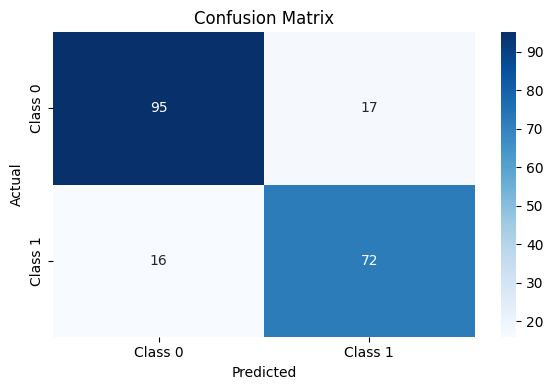

In [17]:
# 11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10,
                           n_classes=2, n_informative=5,
                           random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Class 0', 'Class 1']

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [18]:
# 12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset (Iris for example)
iris = load_iris()
X = iris.data
y = iris.target

# For binary classification, use only two classes
X = X[y != 2]
y = y[y != 2]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Optional: Full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



=== Without Class Weights ===
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       540
           1       0.68      0.63      0.66        60

    accuracy                           0.93       600
   macro avg       0.82      0.80      0.81       600
weighted avg       0.93      0.93      0.93       600



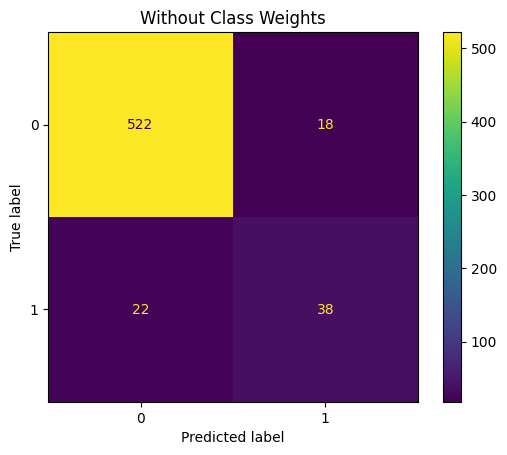

=== With Class Weights (Balanced) ===
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       540
           1       0.53      1.00      0.69        60

    accuracy                           0.91       600
   macro avg       0.77      0.95      0.82       600
weighted avg       0.95      0.91      0.92       600



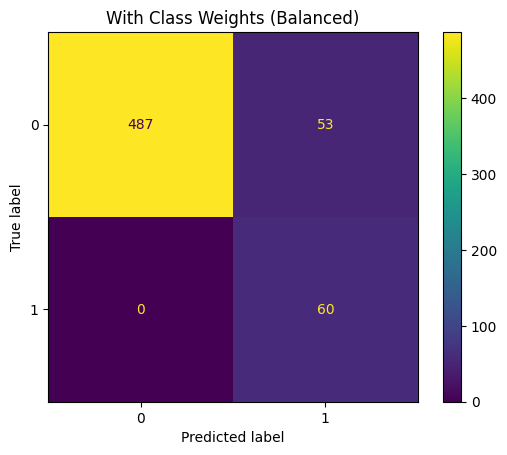

In [20]:
# 13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Generate imbalanced dataset
X, y = make_classification(n_samples=2000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Train logistic regression without class weights
lr_no_weights = LogisticRegression(solver='liblinear')
lr_no_weights.fit(X_train, y_train)
y_pred_no_weights = lr_no_weights.predict(X_test)

# Train logistic regression with class weights
lr_with_weights = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_with_weights.fit(X_train, y_train)
y_pred_with_weights = lr_with_weights.predict(X_test)

# Evaluation
print("=== Without Class Weights ===")
print(classification_report(y_test, y_pred_no_weights))
cm1 = confusion_matrix(y_test, y_pred_no_weights)
ConfusionMatrixDisplay(cm1).plot()
plt.title("Without Class Weights")
plt.show()

print("=== With Class Weights (Balanced) ===")
print(classification_report(y_test, y_pred_with_weights))
cm2 = confusion_matrix(y_test, y_pred_with_weights)
ConfusionMatrixDisplay(cm2).plot()
plt.title("With Class Weights (Balanced)")
plt.show()


In [22]:
# 14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Drop rows where target 'survived' is missing
df.dropna(subset=['survived'], inplace=True)

# Handle missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['deck'] = df['deck'].cat.add_categories('Unknown')
df['deck'].fillna('Unknown', inplace=True)


# Drop columns that are not useful for prediction
df.drop(columns=['who', 'adult_male', 'alive', 'class', 'embark_town'], inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['category', 'object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop('survived', axis=1)
y = df['survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8044692737430168

Confusion Matrix:
 [[90 15]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [23]:
# 15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Without Feature Scaling

model_no_scaling = LogisticRegression(max_iter=200)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)


# With Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_scaling = LogisticRegression(max_iter=200)
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_scaled = model_with_scaling.predict(X_test_scaled)
acc_with_scaling = accuracy_score(y_test, y_pred_scaled)


# Result
print("Accuracy without scaling:", round(acc_no_scaling, 4))
print("Accuracy with scaling:   ", round(acc_with_scaling, 4))

if acc_with_scaling > acc_no_scaling:
    print("Scaling improved the model's performance.")
elif acc_with_scaling < acc_no_scaling:
    print("Scaling reduced the model's performance.")
else:
    print("Scaling did not affect the model's performance.")


Accuracy without scaling: 1.0
Accuracy with scaling:    1.0
Scaling did not affect the model's performance.


ROC-AUC Score: 0.9889


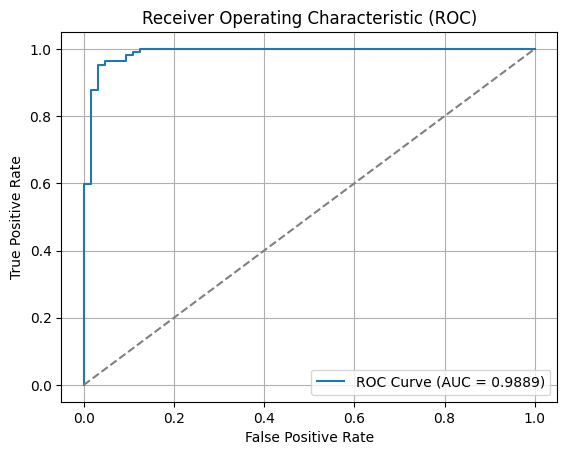

In [24]:
# 16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [25]:
# 17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model with custom learning rate (C=0.5)
model = LogisticRegression(C=0.5, solver='lbfgs', multi_class='auto', max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression (C=0.5): {accuracy:.2f}")


Accuracy of Logistic Regression (C=0.5): 1.00


Top important features:
worst texture           1.350606
radius error            1.268178
worst symmetry          1.208200
mean concave points     1.119804
worst concavity         0.943053
area error              0.907186
worst radius            0.879840
worst area              0.841846
mean concavity          0.801458
worst concave points    0.778217
dtype: float64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

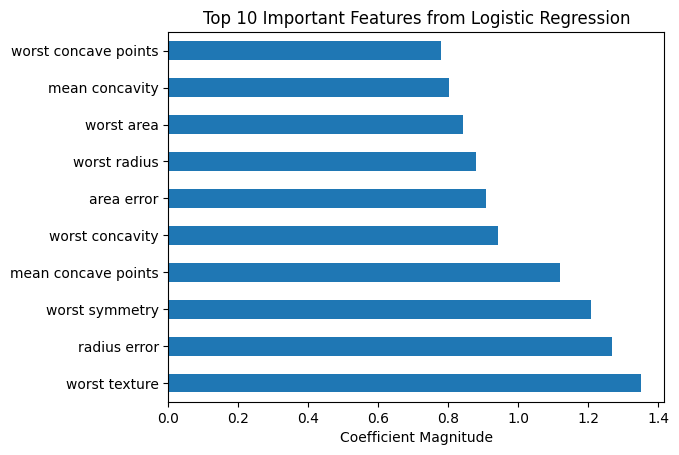

In [26]:
# 18. Write a Python program to train Logistic Regression and identify important features based on model coefficients.

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

# Get feature importance from model coefficients
coefficients = model.coef_[0]
feature_importance = pd.Series(coefficients, index=X.columns)

# Display top positive and negative features
top_features = feature_importance.abs().sort_values(ascending=False)
print("Top important features:")
print(top_features.head(10))

# Plot feature importances
top_features[:10].plot(kind='barh')
plt.title('Top 10 Important Features from Logistic Regression')
plt.xlabel('Coefficient Magnitude')
plt


In [27]:
# 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate using Cohen’s Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Cohen's Kappa Score: {kappa:.4f}")


Accuracy: 0.9737
Cohen's Kappa Score: 0.9437


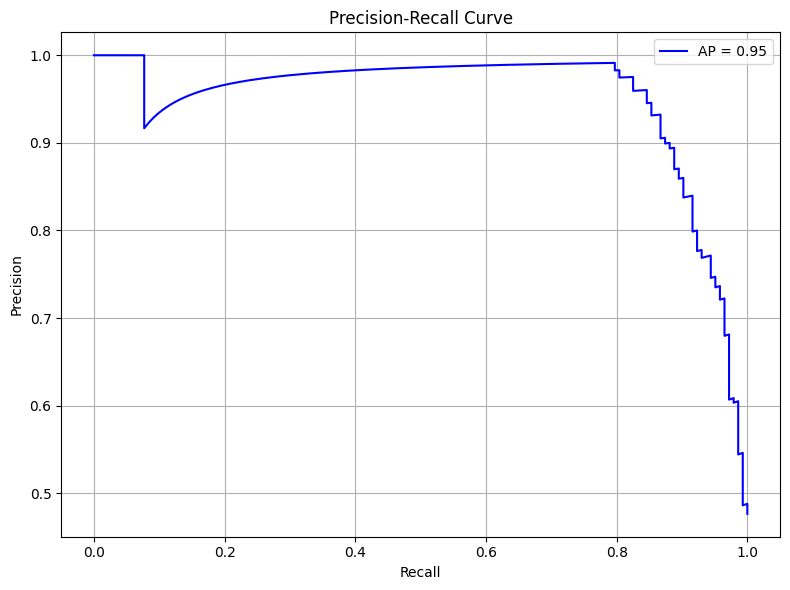

In [28]:
# 20.  Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

# Create synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, random_state=42)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs and average precision
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
# 21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset (you can change this to another dataset)
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Solvers to compare
solvers = ['liblinear', 'saga', 'lbfgs']
results = {}

print("Training Logistic Regression with different solvers...\n")

for solver in solvers:
    try:
        # Create and train the Logistic Regression model
        model = LogisticRegression(solver=solver, max_iter=1000, random_state=42)
        model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[solver] = accuracy

        print(f"Solver: {solver}\tAccuracy: {accuracy:.4f}")
    except Exception as e:
        results[solver] = None
        print(f"Solver: {solver}\tError: {str(e)}")



Training Logistic Regression with different solvers...

Solver: liblinear	Accuracy: 0.9561
Solver: saga	Accuracy: 0.9649
Solver: lbfgs	Accuracy: 0.9561


In [30]:
# 22. Write a Python program to train Logistic Regression and evaluate its performance using Matthewsm Correlation Coefficient (MCC).

import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef, confusion_matrix

# Generate synthetic classification data
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nMatthews Correlation Coefficient (MCC): {mcc:.4f}")


Confusion Matrix:
[[130  30]
 [ 24 116]]

Matthews Correlation Coefficient (MCC): 0.6399


In [31]:
# 23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression on raw data
model_raw = LogisticRegression(max_iter=10000)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression on standardized data
model_scaled = LogisticRegression(max_iter=10000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Output results
print(f"Accuracy on raw data:         {accuracy_raw:.4f}")
print(f"Accuracy on standardized data: {accuracy_scaled:.4f}")


Accuracy on raw data:         0.9561
Accuracy on standardized data: 0.9737


In [32]:
# 24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Load dataset (you can replace this with your own dataset)
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model
log_reg = LogisticRegression(max_iter=10000, solver='liblinear')

# Define parameter grid for C (regularization strength)
param_grid = {'C': np.logspace(-4, 4, 20)}  # e.g. from 0.0001 to 10000

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best parameter and score
print("Best C (Regularization Strength):", grid_search.best_params_['C'])
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


Best C (Regularization Strength): 545.5594781168514
Best Cross-Validation Accuracy: 0.9626373626373628

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [33]:
# 25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(model, 'logistic_model.pkl')
print("Model saved as 'logistic_model.pkl'.")

# Load the model from the file
loaded_model = joblib.load('logistic_model.pkl')
print("Model loaded from 'logistic_model.pkl'.")

# Make predictions and evaluate
y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of loaded model: {accuracy:.2f}")


Model saved as 'logistic_model.pkl'.
Model loaded from 'logistic_model.pkl'.
Accuracy of loaded model: 1.00
